# Basic Graph Algorithms

For additional reading and resources, you can refer to https://jeffe.cs.illinois.edu/teaching/algorithms/book/05-graphs.pdf

## Review of Mergesort

In lecture yesterday, we wrote an iterative approach to merging two arrays for mergesort. Today, we will review a recursive approach to merging which may be a little easier to understand.

In [56]:
# recursive merge
def merge(lst1, lst2):
    pass

In [ ]:
lst1 = [3, 3, 5, 8, 9]
lst2 = [1, 3, 5, 9, 10]

merge(lst1, lst2)

Yesterday, we learned about the graph data structure and how to represent this in code. In lab, you should have had a chance to play around with generating and working with graphs.

Recall that a graph, $G$, is made up of vertices $V$ and edges $E$. Below is an example of a graph:

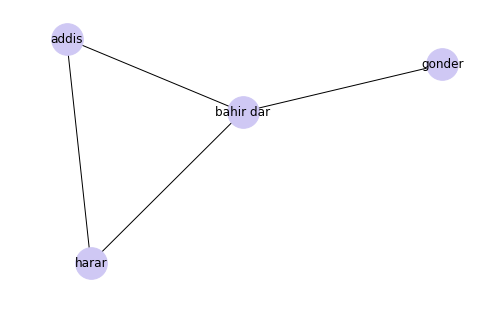

In [59]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([("gonder", "bahir dar"), ("bahir dar", "addis"), ("harar", "bahir dar"), ("harar","addis")])
nx.draw(G, with_labels=True, node_size=1000, node_color='#cfc8f4')

Typically, we will represent graphs in code using an adjacency dictionary. An example of an adjacency dictionary of the above graph is:

In [ ]:
# {"gonder": ["bahir dar"], 
# "bahir dar": ["gonder", "harar", "addis"], 
# "harar": ["bahir dar", "addis"], 
# "addis": ["bahir dar", "harar"]}

Today, we will cover some basic graph algorithms. Currently, we have learned about searching and sorting algorithms and we typically apply these to data structures like lists and dictionaries. However, we will want to use different algorithms for graphs when searching for values due to their structure.

## Reachability
While for lists and dictionaries, we typically care about existence of a value, in graphs we also care about the reachability of a value. That is, in a graph, $G$ that contains a vertex, $s$, which vertices, $v$ have a path between $s$ and $v$. 

Let's first consider this for undirected graphs.

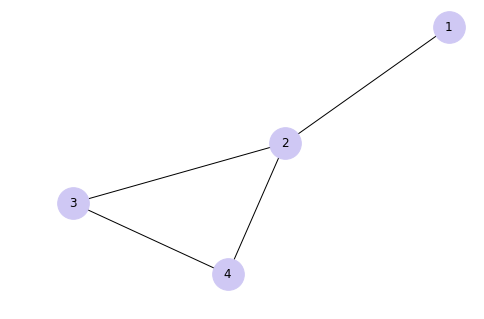

In [2]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 4), (3, 2), (3,4)])
nx.draw(G, with_labels=True, node_size=1000, node_color='#cfc8f4')

Is vertex 4 reachable from vertex 1?

Is vertex 1 reachable from vertex 4?

While we can look at the graph and trace out paths from one vertex to another, the computer requires extra logic to do this. Formally, we can think of reachability as figuring our whether two vertices are connected to each other. 

Given $i$ and $j$ for a graph, $G$, find out if $j$ is connected to $i$ (perhaps indirectly) in the graph.

One natural algorithm we can think about here is that two vertices are connected if $i$ is a neighbor of $j$ or if there is some neighbor of $k$ such that $k$ is connected to $j$.

We can try coding this up to see what happens. We will first need to implement some helper functions:

In [44]:
g_connected = {1: [2, 3], 2: [3], 4: [2, 5], 3: [], 5: [3, 6], 6: [5]}

In [31]:
# helper functions - assume G is an adjacency dictionary
def neighbors(G, u):
    pass

def is_edge(G, u, v):
    pass

In [ ]:
def connected(i, j, G):
    pass

connected(5, 7, g_connected)

What happened? We ran into an infinite loop! This was caused by the fact that vertex 5 connects to 6 and vice versa. We can fix this by keeping track of the vertices we have visited.

In [62]:
def connected(i, j, G, visited=[]):
    pass

In [63]:
connected(5, 7, g_connected), connected(5, 6, g_connected)

([3, 6, 5], [3, 6, 5])

This connected function we implemented? It is better known as depth-first search.

## Depth-first search

Depth-first search or DFS, is a type of graph traversal algorithm which means it allows us move through each node (or vertex) in a graph in a structured manner. 

In DFS, we need to keep track of the nodes or vertices we have seen in order to figure out which we still need to visit. We can follow a few steps to accomplish DFS:
1. Start at a root node
2. Mark node as visited
3. Pick one neighbor and explore as far as possible along a branch before backtracking 
4. Repeat exploration for all neighbors

Let's start by creating a function for converting graph edges to an adjacency dictionary. You might have already done this in lab.

In [14]:
# convert graph edges to adjacency dictionary
def convert_adjacency(edges):
    pass

In [42]:
g = [[1, 2], [2, 3], [4, 2], [1, 3], [5, 3], [4, 5], [5, 6], [6, 5]]
g_adj = convert_adjacency(g)
print(g_adj)

{1: [2, 3], 2: [3], 4: [2, 5], 3: [], 5: [3, 6], 6: [5]}


Next, let's try to implement DFS.

In [ ]:
def dfs(visited, graph, node):
    pass

In [ ]:
for i in g_adj.keys():
    visited = []
    print("DFS from", i)
    dfs(visited, g_adj, i)

## DFS Time Complexity

The time complexity of DFS is $O(V + E)$ where $V$ is the number of vertices and $E$ is the number of edges. This is because the algorithm explores each vertex and edge exactly once. 

## Applications of DFS

DFS has many applications that it can be used for. Some examples are:
1. Finding a path between two points $u$ and $v$
2. Finding strongly connected components of a graph
3. Detecting cycles in a graph
4. Searching for solutions in artificial intelligence
5. Social networks